## Especialização em Ciência de Dados - PUCRS - 2020
## Trabalho de Conclusão do Curso
# Classificação da evolução de casos e mortes na pandemia de COVID-19
### Orientando: Luciano Witt Gonçalves
### Orientador: Juliano Gomes da Silveira
### Dataset: UNCOVER COVID-19 Challenge - Roche Data Science Coalition - Kagge.com

https://www.kaggle.com/roche-data-science-coalition/uncover/data

Última atualização do dataset: 24/07/2020

### Conteúdo
[1. Distribuição geográfica da COVID-19](#1.-Distribuição-geográfica-da-COVID-19)<br>
&emsp;[1.1. Dataset original](#1.1.-Dataset-original)<br>
&emsp;[1.2. Totais de casos e mortes acumulados](#1.2.-Totais-de-casos-e-mortes-acumulados)<br>
&emsp;[1.3. Evolução semanal dos números de cada país, a partir do primeiro caso](#1.3.-Evolução-semanal-dos-números-de-cada-país,-a-partir-do-primeiro-caso)<br>
&emsp;[1.4. Números por 100 mil habitantes](#1.4.-Números-por-100-mil-habitantes)<br>
[2. Indicadores](#2.-Indicadores)<br>
&emsp;[2.1. PIB](#2.1.-PIB)<br>
&emsp;[2.2. IDH](#2.2.-IDH)<br>
&emsp;[2.3. Cobertura dos serviços de saúde essenciais](#2.3.-Cobertura-dos-serviços-de-saúde-essenciais)<br>
&emsp;[2.4. Distribuição populacional](#2.4.-Distribuição-populacional)<br>
&emsp;&emsp;[2.4.1. População total](#2.4.1.-População-total)<br>
&emsp;&emsp;[2.4.2. População de zero a 14 anos de idade](#2.4.2.-População-de-zero-a-14-anos-de-idade)<br>
&emsp;&emsp;[2.4.3. População de 15 a 64 anos de idade](#2.4.3.-População-de-15-a-64-anos-de-idade)<br>
&emsp;&emsp;[2.4.4. População de 65 anos de idade em diante](#2.4.4.-População-de-65-anos-de-idade-em-diante)<br>
&emsp;&emsp;[2.4.5. Dataset final da distribuição populacional](#2.4.5.-Dataset-final-da-distribuição-populacional)<br>
&emsp;[2.5. Dataset final de inficadores](#2.5.-Dataset-final-de-inficadores)<br>
[3. Dataset final](#3.-Dataset-final)


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dateutil.relativedelta import relativedelta
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Países selecionados para análise visual do dataset

In [2]:
subject_countries = ['BRA','CHN','ESP','DEU','ITA','JPN','KOR','PRT','GBR','USA']

## 1. Distribuição geográfica da COVID-19

### 1.1. Dataset original

Dataset da distribuição de casos e mortes por COVID-19 no mundo

In [3]:
df = pd.read_csv('data\COVID-19-geographic-distribution-worldwide-2020-07-24.csv', ';')
df.dropna(inplace=True)
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,24/07/2020,24,7,2020,13,0,Afghanistan,AF,AFG,38041757.0,Asia,"5,30995453"
1,23/07/2020,23,7,2020,188,21,Afghanistan,AF,AFG,38041757.0,Asia,"5,9460976"
2,22/07/2020,22,7,2020,112,4,Afghanistan,AF,AFG,38041757.0,Asia,"5,60699654"
3,21/07/2020,21,7,2020,140,5,Afghanistan,AF,AFG,38041757.0,Asia,"5,8646082"
4,20/07/2020,20,7,2020,174,17,Afghanistan,AF,AFG,38041757.0,Asia,"6,63481448"


### 1.2. Totais de casos e mortes acumulados

Adicionadas colunas com acumuladores de casos e mortes, pois o dataset original tinha apenas os números novos a cada dia. Algumas colunas foram renomeadas para facilitar a visualização

In [4]:
df.drop(columns=['day','month','year','geoId','continentExp','Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'], inplace=True)
df.rename(columns={'dateRep':'date','countriesAndTerritories':'country','countryterritoryCode':'code','popData2019':'pop'}, inplace=True)
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df.sort_values(by=['code','date'], ascending=True, inplace=True)
df['total_cases'] = df.groupby(by='code')['cases'].cumsum()
df['total_deaths'] = df.groupby(by='code')['deaths'].cumsum()
df.head()

,date,cases,deaths,country,code,pop,total_cases,total_deaths
1490,2020-04-05,2,0,Aruba,ABW,106310.0,2,0
1489,2020-04-06,0,0,Aruba,ABW,106310.0,2,0
1488,2020-04-07,7,0,Aruba,ABW,106310.0,9,0
1487,2020-04-08,3,0,Aruba,ABW,106310.0,12,0
1486,2020-04-09,3,0,Aruba,ABW,106310.0,15,0


In [5]:
df['country'] = df['country'].str.replace('_', ' ')

Abaixo os gráficos dos totais de casos e mortes no tempo

In [6]:
def setupDatetimeAxis(ax):
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_minor_locator(mdates.DayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%B-%Y"))

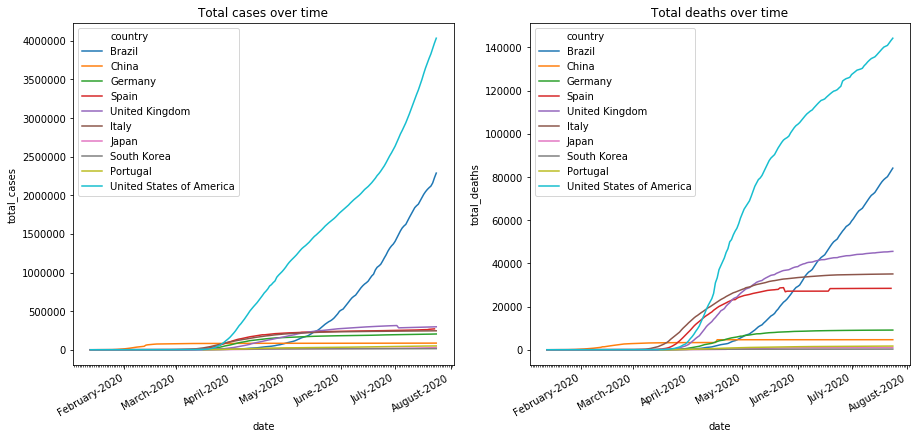

In [7]:
df_vis = df.loc[df['code'].isin(subject_countries)]

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(15,7))

ax1.set_title('Total cases over time')
setupDatetimeAxis(ax1)
sns.lineplot(x='date', y='total_cases', hue='country', data=df_vis, ax=ax1, sort=False)

ax2.set_title('Total deaths over time')
setupDatetimeAxis(ax2)
sns.lineplot(x='date', y='total_deaths', hue='country', data=df_vis, ax=ax2, sort=False)

fig.autofmt_xdate()
plt.show()

### 1.3. Evolução semanal dos números de cada país, a partir do primeiro caso

Como os casos começaram a aparecer em datas diferentes em cada país, não faz muito sentido comparar dados na mesma data, mas sim no mesmo tempo decorrido desde o primeiro caso de cada país, então vamos calcular, para cada país, os totais por semana, desde o primeiro caso do respectivo país

Primeiramente removemos os registros anteriores ao primeiro caso de cada país

In [8]:
df2 = df.copy()
df2 = df2[df2['total_cases'] > 0]
df2.sort_values(by=['code','date'], ascending=True, inplace=True)

Então, para cada registro, calculamos a semana relativa ao primeiro caso deste país

In [9]:
df2['min_date'] = df2.groupby(by='code')['date'].transform('min')
df2['days_passed'] = df2['date'] - df2['min_date']
df2['week'] = (df2['days_passed'] / np.timedelta64(1, 'W')).astype(int) + 1

Finalmente, calculamos o total de cada semana, e descartamos registros duplicados, deixando somente um registro por semana contendo os respetivos totais

In [10]:
df2 = df2.drop(columns=['date','cases','deaths','min_date','days_passed'])
df2['max_total_cases'] = df2.groupby(by=['code','week'])['total_cases'].transform(max)
df2['max_total_deaths'] = df2.groupby(by=['code','week'])['total_deaths'].transform(max)
df2 = df2.drop(columns=['total_cases','total_deaths'])
df2 = df2.rename(columns={'max_total_cases':'total_cases','max_total_deaths':'total_deaths'})
df2.drop_duplicates(inplace=True)
df2[df2['code']=='BRA'].head(10)

,country,code,pop,week,total_cases,total_deaths
4279,Brazil,BRA,211049519.0,1,2,0
4272,Brazil,BRA,211049519.0,2,25,0
4265,Brazil,BRA,211049519.0,3,234,0
4258,Brazil,BRA,211049519.0,4,1891,34
4251,Brazil,BRA,211049519.0,5,4579,159
4244,Brazil,BRA,211049519.0,6,12056,553
4237,Brazil,BRA,211049519.0,7,23430,1328
4230,Brazil,BRA,211049519.0,8,40581,2575
4223,Brazil,BRA,211049519.0,9,66501,4543
4216,Brazil,BRA,211049519.0,10,107780,7321


Abaixo os gráficos dos totais de casos e mortes por semana, desde o primeiro caso, para cada país

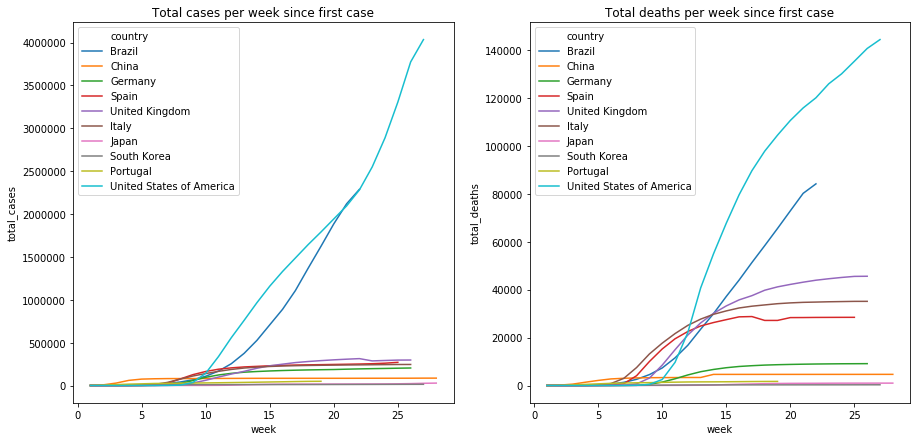

In [11]:
df_vis = df2.loc[df['code'].isin(subject_countries)]

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(15,7))

ax1.set_title('Total cases per week since first case')
sns.lineplot(x='week', y='total_cases', hue='country', data=df_vis, ax=ax1)

ax2.set_title('Total deaths per week since first case')
sns.lineplot(x='week', y='total_deaths', hue='country', data=df_vis, ax=ax2)

plt.show()

### 1.4. Números por 100 mil habitantes

Os dados calculados até o momento são números absolutos, porém esses países têm populações diferentes, então vamos calcular os números por 100 mil habitantes, para uma comparação mais proporcional

In [12]:
df3 = df2.copy()
df3['total_cases_100k'] = df3['total_cases'] * 100000 / df3['pop']
df3['total_deaths_100k'] = df3['total_deaths'] * 100000 / df3['pop']
df3.drop(columns=['pop','total_cases','total_deaths'], inplace=True)
df3.rename(columns={'total_cases_100k':'total_cases','total_deaths_100k':'total_deaths'}, inplace=True)
df3.head(12)

,country,code,week,total_cases,total_deaths
1490,Aruba,ABW,1,22.575487,0.000000
1483,Aruba,ABW,2,31.981940,1.881291
1476,Aruba,ABW,3,35.744521,1.881291
1469,Aruba,ABW,4,35.744521,1.881291
1462,Aruba,ABW,5,36.685166,2.821936
1455,Aruba,ABW,6,36.685166,2.821936
1448,Aruba,ABW,7,36.685166,2.821936
1441,Aruba,ABW,8,36.685166,2.821936
1434,Aruba,ABW,9,36.685166,2.821936
1427,Aruba,ABW,10,36.685166,2.821936


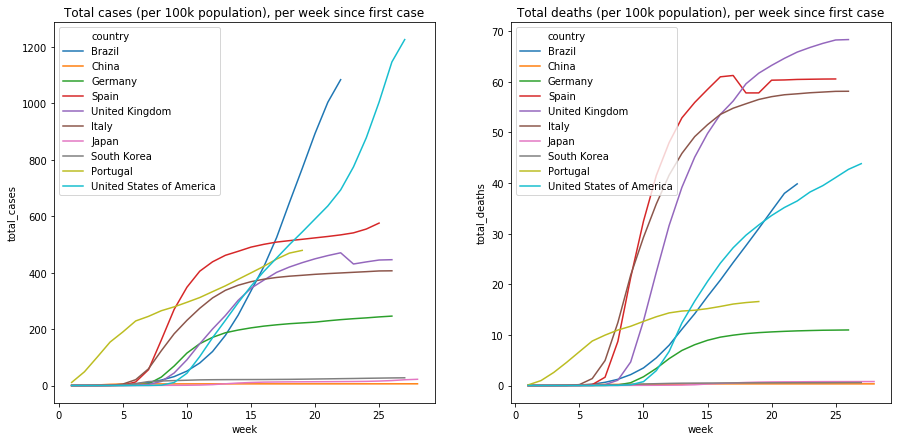

In [13]:
df_vis = df3.loc[df['code'].isin(subject_countries)]

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(15,7))

ax1.set_title('Total cases (per 100k population), per week since first case')
sns.lineplot(x='week', y='total_cases', hue='country', data=df_vis, ax=ax1)

ax2.set_title('Total deaths (per 100k population), per week since first case')
sns.lineplot(x='week', y='total_deaths', hue='country', data=df_vis, ax=ax2)

plt.show()

In [14]:
df3.to_csv('data\COVID-19-numbers-per-week-since-1st-case-until-2020-07-24.csv', ';', index=False)

## 2. Indicadores

### 2.1. PIB

In [15]:
df_gdp = pd.read_csv('data\API_NY.GDP.MKTP.PP.CD_DS2_en_csv_v2_1069861.csv')
df_gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.502846e+09,3.443754e+09,3.596191e+09,3.623628e+09,3.536556e+09,3.496393e+09,3.578912e+09,NaN,NaN,NaN
1,Afghanistan,AFG,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.118418e+10,5.966700e+10,6.503984e+10,6.905834e+10,7.183170e+10,7.533026e+10,7.994539e+10,8.273686e+10,NaN,NaN
2,Angola,AGO,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.625388e+11,1.864274e+11,2.001376e+11,2.203594e+11,2.046388e+11,2.049368e+11,2.179873e+11,2.185333e+11,NaN,NaN
3,Albania,ALB,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.965540e+10,3.053033e+10,3.060407e+10,3.252920e+10,3.359487e+10,3.473647e+10,3.762405e+10,3.965788e+10,NaN,NaN
4,Andorra,AND,"GDP, PPP (current international $)",NY.GDP.MKTP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_gdp = df_gdp[['Country Code','2018']]
df_gdp.rename(columns={'Country Code': 'code', '2018': 'gdp'}, inplace=True)
df_gdp.dropna(inplace=True)
df_gdp.set_index(['code'], inplace=True)
df_gdp.head()

,gdp
code,
AFG,8.273686e+10
AGO,2.185333e+11
ALB,3.965788e+10
ARB,6.249507e+12
ARE,6.505677e+11


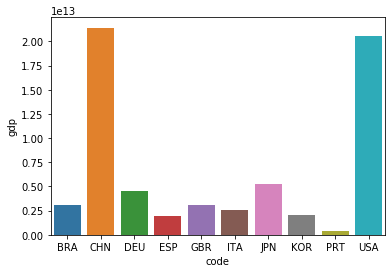

In [17]:
df_vis = df_gdp.reset_index()
df_vis = df_vis.loc[df_vis['code'].isin(subject_countries)]
sns.barplot(x='code', y='gdp', data=df_vis)
plt.show()

### 2.2. IDH

In [18]:
df_hdi = pd.read_csv('data\Human development index (HDI).csv', ';')
df_hdi.head()

,HDI Rank (2018),Country Code,Country,1990,1991,1992,1993,1994,1995,1996,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,170,AFG,Afghanistan,0.298,0.304,0.312,0.308,0.303,0.327,0.331,...,0.447,0.464,0.465,0.479,0.485,0.488,0.490,0.491,0.493,0.496
1,69,ALB,Albania,0.644,0.625,0.608,0.611,0.617,0.629,0.639,...,0.729,0.740,0.759,0.771,0.781,0.787,0.788,0.788,0.789,0.791
2,82,DZA,Algeria,0.578,0.582,0.589,0.593,0.597,0.602,0.610,...,0.720,0.730,0.738,0.737,0.746,0.749,0.751,0.755,0.758,0.759
3,36,AND,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.830,0.828,0.827,0.849,0.846,0.853,0.850,0.854,0.852,0.857
4,149,AGO,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.508,0.510,0.525,0.537,0.547,0.557,0.565,0.570,0.576,0.574


In [19]:
df_hdi = df_hdi[['Country Code','2018']]
df_hdi.rename(columns={'Country Code': 'code', '2018': 'hdi'}, inplace=True)
df_hdi.dropna(inplace=True)
df_hdi.set_index(['code'], inplace=True)
df_hdi.head()

,hdi
code,
AFG,0.496
ALB,0.791
DZA,0.759
AND,0.857
AGO,0.574


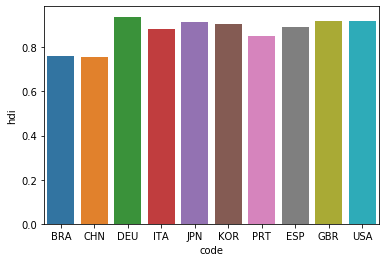

In [20]:
df_vis = df_hdi.reset_index()
df_vis = df_vis.loc[df_vis['code'].isin(subject_countries)]
sns.barplot(x='code', y='hdi', data=df_vis)
plt.show()

### 2.3. Cobertura dos serviços de saúde essenciais 

In [21]:
df_uhc = pd.read_csv('data\WHO_UHC_index_of_essential_service_coverage.csv', ';')
df_uhc.head()

,Country Code,Location,Indicator,Period,First Tooltip
0,AFG,Afghanistan,UHC index of essential service coverage (%),2017,0.37
1,AFG,Afghanistan,UHC index of essential service coverage (%),2015,0.34
2,ALB,Albania,UHC index of essential service coverage (%),2017,0.59
3,ALB,Albania,UHC index of essential service coverage (%),2015,0.58
4,DZA,Algeria,UHC index of essential service coverage (%),2017,0.78


In [22]:
df_uhc = df_uhc.loc[df_uhc['Period'] == df_uhc['Period'].max()]
df_uhc = df_uhc[['Country Code','First Tooltip']]
df_uhc.rename(columns={'Country Code': 'code', 'First Tooltip': 'uhc'}, inplace=True)
df_uhc.dropna(inplace=True)
df_uhc.set_index(['code'], inplace=True)
df_uhc.head()

,uhc
code,
AFG,0.37
ALB,0.59
DZA,0.78
AGO,0.40
ATG,0.73


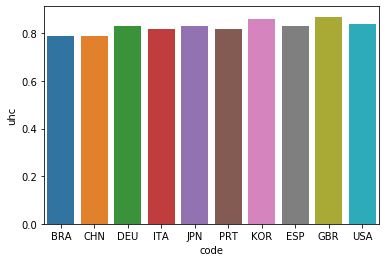

In [23]:
df_vis = df_uhc.reset_index()
df_vis = df_vis.loc[df_vis['code'].isin(subject_countries)]
sns.barplot(x='code', y='uhc', data=df_vis)
plt.show()

### 2.4. Distribuição populacional

#### 2.4.1. População total

In [24]:
df_pop_total = pd.read_csv('data\API_SP.POP.TOTL_DS2_en_csv_v2_1217749.csv')
df_pop_total.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN


In [25]:
df_pop_total = df_pop_total[['Country Code','2018']]
df_pop_total.rename(columns={'Country Code': 'code', '2018': 'pop_total'}, inplace=True)
df_pop_total.dropna(inplace=True)
df_pop_total.set_index(['code'], inplace=True)
df_pop_total.head()

,pop_total
code,
ABW,105845.0
AFG,37172386.0
AGO,30809762.0
ALB,2866376.0
AND,77006.0


#### 2.4.2. População de zero a 14 anos de idade

In [26]:
df_pop_00_14 = pd.read_csv('data\API_SP.POP.0014.TO_DS2_en_csv_v2_1004418.csv')
df_pop_00_14.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Population ages 0-14, total",SP.POP.0014.TO,23770.0,24037.0,24135.0,24089.0,23925.0,23684.0,...,21222.0,20951.0,20607.0,20212.0,19833.0,19515.0,19147.0,18945.0,18843.0,NaN
1,Afghanistan,AFG,"Population ages 0-14, total",SP.POP.0014.TO,3791401.0,3892776.0,3987207.0,4079606.0,4176101.0,4279406.0,...,14061036.0,14366485.0,14673817.0,14968788.0,15230627.0,15443806.0,15664859.0,15855184.0,16017646.0,NaN
2,Angola,AGO,"Population ages 0-14, total",SP.POP.0014.TO,2298276.0,2366959.0,2439522.0,2504084.0,2547459.0,2565874.0,...,10987155.0,11418718.0,11849944.0,12280860.0,12710366.0,13136045.0,13571356.0,13999863.0,14421718.0,NaN
3,Albania,ALB,"Population ages 0-14, total",SP.POP.0014.TO,646025.0,672912.0,699944.0,726429.0,751660.0,774509.0,...,654121.0,623783.0,597500.0,574857.0,555294.0,537791.0,528734.0,518036.0,506571.0,NaN
4,Andorra,AND,"Population ages 0-14, total",SP.POP.0014.TO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_pop_00_14 = df_pop_00_14[['Country Code','2018']]
df_pop_00_14.rename(columns={'Country Code': 'code', '2018': 'pop_0_14'}, inplace=True)
df_pop_00_14.dropna(inplace=True)
df_pop_00_14.sort_values(by=['code'])
df_pop_00_14.set_index(['code'], inplace=True)
df_pop_00_14.head()

,pop_0_14
code,
ABW,18843.0
AFG,16017646.0
AGO,14421718.0
ALB,506571.0
ARB,137609185.0


#### 2.4.3. População de 15 a 64 anos de idade

In [28]:
df_pop_15_64 = pd.read_csv('data\API_SP.POP.1564.TO_DS2_en_csv_v2_1004520.csv')
df_pop_15_64.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Population ages 15-64, total",SP.POP.1564.TO,29095.0,29968.0,30577.0,31018.0,31436.0,31910.0,...,69987.0,70295.0,70753.0,71292.0,71792.0,72162.0,72506.0,72646.0,72659.0,NaN
1,Afghanistan,AFG,"Population ages 15-64, total",SP.POP.1564.TO,4953809.0,5019145.0,5102009.0,5197709.0,5300287.0,5407208.0,...,14444994.0,15041825.0,15743957.0,16519810.0,17322057.0,18116800.0,18826642.0,19514114.0,20193861.0,NaN
2,Angola,AGO,"Population ages 15-64, total",SP.POP.1564.TO,2992630.0,2996073.0,2997144.0,3000938.0,3011480.0,3028008.0,...,11817707.0,12233380.0,12671465.0,13130630.0,13610932.0,14113726.0,14618994.0,15149230.0,15705184.0,NaN
3,Albania,ALB,"Population ages 15-64, total",SP.POP.1564.TO,875725.0,897410.0,918872.0,940393.0,963492.0,988506.0,...,1948797.0,1961405.0,1972618.0,1979460.0,1981897.0,1979179.0,1974734.0,1972416.0,1965829.0,NaN
4,Andorra,AND,"Population ages 15-64, total",SP.POP.1564.TO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df_pop_15_64 = df_pop_15_64[['Country Code','2018']]
df_pop_15_64.rename(columns={'Country Code': 'code', '2018': 'pop_15_64'}, inplace=True)
df_pop_15_64.dropna(inplace=True)
df_pop_15_64.set_index(['code'], inplace=True)
df_pop_15_64.head()

,pop_15_64
code,
ABW,72659.0
AFG,20193861.0
AGO,15705184.0
ALB,1965829.0
ARB,263047867.0


#### 2.4.4. População de 65 anos de idade em diante

In [30]:
df_pop_65plus= pd.read_csv('data\API_SP.POP.65UP.TO_DS2_en_csv_v2_993674.csv')
df_pop_65plus.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Population ages 65 and above, total",SP.POP.65UP.TO,1346.0,1433.0,1513.0,1588.0,1671.0,1766.0,...,10460.0,10800.0,11200.0,11655.0,12149.0,12664.0,13219.0,13775.0,14343.0,NaN
1,Afghanistan,AFG,"Population ages 65 and above, total",SP.POP.65UP.TO,251763.0,257489.0,262225.0,265890.0,268393.0,269706.0,...,679477.0,709103.0,743602.0,780991.0,818110.0,852997.0,891627.0,927101.0,960879.0,NaN
2,Angola,AGO,"Population ages 65 and above, total",SP.POP.65UP.TO,164027.0,168440.0,171873.0,174436.0,176105.0,176688.0,...,551384.0,568563.0,586522.0,604290.0,620481.0,634610.0,652134.0,667656.0,682859.0,NaN
3,Albania,ALB,"Population ages 65 and above, total",SP.POP.65UP.TO,87049.0,89478.0,92504.0,95799.0,98983.0,101776.0,...,310103.0,320007.0,330283.0,340775.0,351913.0,363733.0,372634.0,383005.0,393976.0,NaN
4,Andorra,AND,"Population ages 65 and above, total",SP.POP.65UP.TO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df_pop_65plus = df_pop_65plus[['Country Code','2018']]
df_pop_65plus.rename(columns={'Country Code': 'code', '2018': 'pop_65+'}, inplace=True)
df_pop_65plus.dropna(inplace=True)
df_pop_65plus.set_index(['code'], inplace=True)
df_pop_65plus.head()

,pop_65+
code,
ABW,14343.0
AFG,960879.0
AGO,682859.0
ALB,393976.0
ARB,19133535.0


#### 2.4.5. Dataset final da distribuição populacional

In [32]:
df_pop = df_pop_total.join(df_pop_00_14).join(df_pop_15_64).join(df_pop_65plus)
df_pop.dropna(inplace=True)
df_pop.head()

,pop_total,pop_0_14,pop_15_64,pop_65+
code,,,,
ABW,105845.0,18843.0,72659.0,14343.0
AFG,37172386.0,16017646.0,20193861.0,960879.0
AGO,30809762.0,14421718.0,15705184.0,682859.0
ALB,2866376.0,506571.0,1965829.0,393976.0
ARB,419790591.0,137609185.0,263047867.0,19133535.0


In [33]:
df_pop['pop_0_14'] = df_pop['pop_0_14'] / df_pop['pop_total']
df_pop['pop_15_64'] = df_pop['pop_15_64'] / df_pop['pop_total']
df_pop['pop_65+'] = df_pop['pop_65+'] / df_pop['pop_total']
df_pop.head()

,pop_total,pop_0_14,pop_15_64,pop_65+
code,,,,
ABW,105845.0,0.178024,0.686466,0.135509
AFG,37172386.0,0.430902,0.543249,0.025849
AGO,30809762.0,0.468089,0.509747,0.022164
ALB,2866376.0,0.176729,0.685824,0.137447
ARB,419790591.0,0.327804,0.626617,0.045579


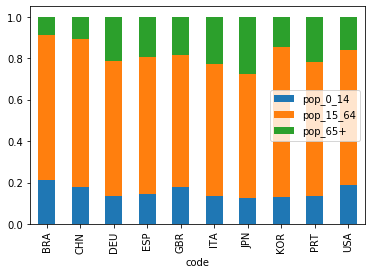

In [34]:
df_vis = df_pop.reset_index().drop(columns='pop_total')
df_vis = df_vis.loc[df_vis['code'].isin(subject_countries)]
df_vis.set_index('code').plot(kind='bar', stacked=True)
plt.show()

### 2.5. Dataset final de inficadores

In [35]:
df_ind = df_uhc.join(df_pop).join(df_gdp).join(df_hdi)
df_ind.dropna(inplace=True)
df_ind.head()

,uhc,pop_total,pop_0_14,pop_15_64,pop_65+,gdp,hdi
code,,,,,,,
AFG,0.37,37172386.0,0.430902,0.543249,0.025849,8.273686e+10,0.496
ALB,0.59,2866376.0,0.176729,0.685824,0.137447,3.965788e+10,0.791
DZA,0.78,42228429.0,0.301487,0.634888,0.063625,4.965724e+11,0.759
AGO,0.40,30809762.0,0.468089,0.509747,0.022164,2.185333e+11,0.574
ATG,0.73,96286.0,0.220811,0.691191,0.087998,2.082682e+09,0.776


No dataset original dp PIB temos números absolutos, porém há grandes diferenças populacionais entre os países, então vamos calcular os números por 100 mil habitantes, para uma comparação mais proporcional

In [36]:
df_ind['gdp'] = df_ind['gdp'] * 100000.0 / df_ind['pop_total']
df_ind.drop(columns=['pop_total'], inplace=True)
df_ind.head()

,uhc,pop_0_14,pop_15_64,pop_65+,gdp,hdi
code,,,,,,
AFG,0.37,0.430902,0.543249,0.025849,2.225761e+08,0.496
ALB,0.59,0.176729,0.685824,0.137447,1.383555e+09,0.791
DZA,0.78,0.301487,0.634888,0.063625,1.175920e+09,0.759
AGO,0.40,0.468089,0.509747,0.022164,7.092990e+08,0.574
ATG,0.73,0.220811,0.691191,0.087998,2.163017e+09,0.776


#### PIB por 100 mil habitantes

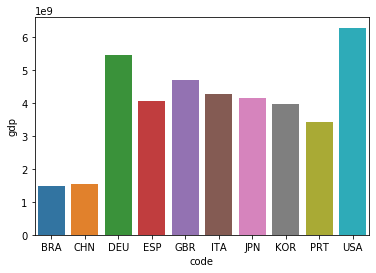

In [37]:
df_vis = df_gdp[['gdp']]
df_vis = df_vis.join(df_pop_total)
df_vis['gdp'] = df_vis['gdp'] * 100000.0 / df_vis['pop_total']
df_vis.reset_index(inplace=True)
df_vis.drop(columns=['pop_total'], inplace=True)
df_vis = df_vis.loc[df_vis['code'].isin(subject_countries)]
sns.barplot(x='code', y='gdp', data=df_vis)
plt.show()

## 3. Dataset final

In [38]:
df4 = df3.join(df_ind, on=['code'])
df4.rename(columns={'total_cases':'cases','total_deaths':'deaths'}, inplace=True)
df4.dropna(inplace=True)
df4.head()

,country,code,week,cases,deaths,uhc,pop_0_14,pop_15_64,pop_65+,gdp,hdi
140,Afghanistan,AFG,1,0.002629,0.000000,0.37,0.430902,0.543249,0.025849,2.225761e+08,0.496
133,Afghanistan,AFG,2,0.010515,0.000000,0.37,0.430902,0.543249,0.025849,2.225761e+08,0.496
132,Afghanistan,AFG,3,0.042059,0.000000,0.37,0.430902,0.543249,0.025849,2.225761e+08,0.496
129,Afghanistan,AFG,4,0.089375,0.000000,0.37,0.430902,0.543249,0.025849,2.225761e+08,0.496
122,Afghanistan,AFG,5,0.299671,0.010515,0.37,0.430902,0.543249,0.025849,2.225761e+08,0.496


#### Por fim vamos adicionar em cada registro os números da semana anterior, para o treinamento do modelo 

In [39]:
df5 = df4.copy()
df5['prev_cases'] = df5.groupby(['code'])['cases'].shift(1, fill_value=0)
df5['prev_deaths'] = df5.groupby(['code'])['deaths'].shift(1, fill_value=0)
df5.head()

,country,code,week,cases,deaths,uhc,pop_0_14,pop_15_64,pop_65+,gdp,hdi,prev_cases,prev_deaths
140,Afghanistan,AFG,1,0.002629,0.000000,0.37,0.430902,0.543249,0.025849,2.225761e+08,0.496,0.000000,0.0
133,Afghanistan,AFG,2,0.010515,0.000000,0.37,0.430902,0.543249,0.025849,2.225761e+08,0.496,0.002629,0.0
132,Afghanistan,AFG,3,0.042059,0.000000,0.37,0.430902,0.543249,0.025849,2.225761e+08,0.496,0.010515,0.0
129,Afghanistan,AFG,4,0.089375,0.000000,0.37,0.430902,0.543249,0.025849,2.225761e+08,0.496,0.042059,0.0
122,Afghanistan,AFG,5,0.299671,0.010515,0.37,0.430902,0.543249,0.025849,2.225761e+08,0.496,0.089375,0.0


In [40]:
df_final = df5[['code','country','gdp','hdi','uhc','pop_0_14','pop_15_64','pop_65+','week','prev_cases','prev_deaths','cases','deaths']]
df_final.head(10)

,code,country,gdp,hdi,uhc,pop_0_14,pop_15_64,pop_65+,week,prev_cases,prev_deaths,cases,deaths
140,AFG,Afghanistan,2.225761e+08,0.496,0.37,0.430902,0.543249,0.025849,1,0.000000,0.000000,0.002629,0.000000
133,AFG,Afghanistan,2.225761e+08,0.496,0.37,0.430902,0.543249,0.025849,2,0.002629,0.000000,0.010515,0.000000
132,AFG,Afghanistan,2.225761e+08,0.496,0.37,0.430902,0.543249,0.025849,3,0.010515,0.000000,0.042059,0.000000
129,AFG,Afghanistan,2.225761e+08,0.496,0.37,0.430902,0.543249,0.025849,4,0.042059,0.000000,0.089375,0.000000
122,AFG,Afghanistan,2.225761e+08,0.496,0.37,0.430902,0.543249,0.025849,5,0.089375,0.000000,0.299671,0.010515
115,AFG,Afghanistan,2.225761e+08,0.496,0.37,0.430902,0.543249,0.025849,6,0.299671,0.010515,0.785978,0.018401
108,AFG,Afghanistan,2.225761e+08,0.496,0.37,0.430902,0.543249,0.025849,7,0.785978,0.018401,1.595615,0.047316
101,AFG,Afghanistan,2.225761e+08,0.496,0.37,0.430902,0.543249,0.025849,8,1.595615,0.047316,2.618176,0.086747
94,AFG,Afghanistan,2.225761e+08,0.496,0.37,0.430902,0.543249,0.025849,9,2.618176,0.086747,4.024525,0.149835
87,AFG,Afghanistan,2.225761e+08,0.496,0.37,0.430902,0.543249,0.025849,10,4.024525,0.149835,7.107979,0.223439


In [41]:
df_final.to_csv('data\COVID-19-final.csv', ';', index=False)